<h1> Eduardo Hernandez HW2 </h1>

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import stat as st 

In [2]:
data = pd.read_csv("Real estate.csv")

<h1> EDA and Feature engineering </h1>

In [159]:
data.shape


(414, 8)

In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [46]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [30]:
data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [13]:
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [47]:
data.nunique()

No                                        414
X1 transaction date                        12
X2 house age                              236
X3 distance to the nearest MRT station    259
X4 number of convenience stores            11
X5 latitude                               234
X6 longitude                              232
Y house price of unit area                270
dtype: int64

In [48]:
data.isnull().sum()
#THERE ARE NO MISSING VALUES, SO WE DON'T NEED TO CLEAN THE DATA

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [210]:
import pandas as pd

correlations = data.corr()['Y house price of unit area'].abs().sort_values(ascending=False)

print(correlations)
 

Y house price of unit area                1.000000
X3 distance to the nearest MRT station    0.673613
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
X2 house age                              0.210567
X1 transaction date                       0.087491
No                                        0.028587
Name: Y house price of unit area, dtype: float64


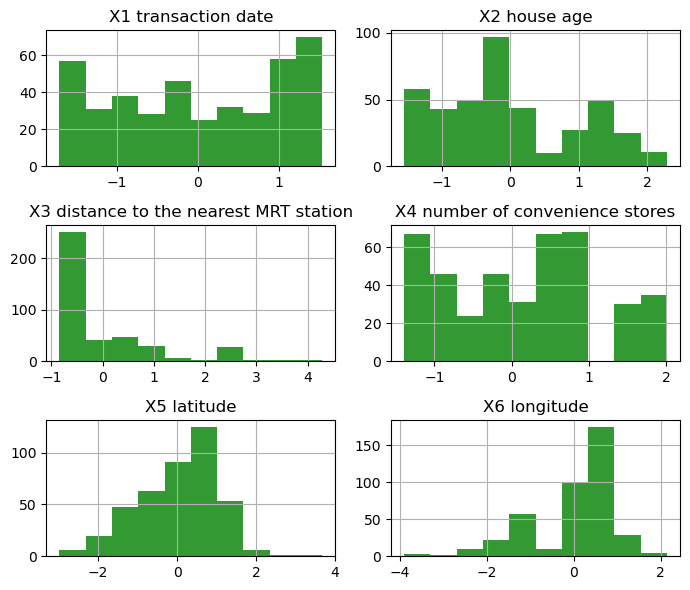

In [297]:
import matplotlib.pyplot as plt

numerical_features = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']
data[numerical_features].hist(bins=10, figsize=(7, 6), color='green', alpha= 0.8)
plt.tight_layout()  

plt.show()

#visualize distribution of data

<h1> split data into training and testing using numpy  and visualize </h1>

In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


split_ratio = 0.75
mean = data.mean()
std = data.std()

# # Standardize the entire dataset (both features and target variable)
data = (data - mean) / std


num_train_samples = int(split_ratio * len(data))

#sluffle the data
dataset = data.values

np.random.shuffle(dataset)
# Split the data into training and testing sets
train_data = dataset[:num_train_samples]
test_data = dataset[num_train_samples:]







'explain performance'

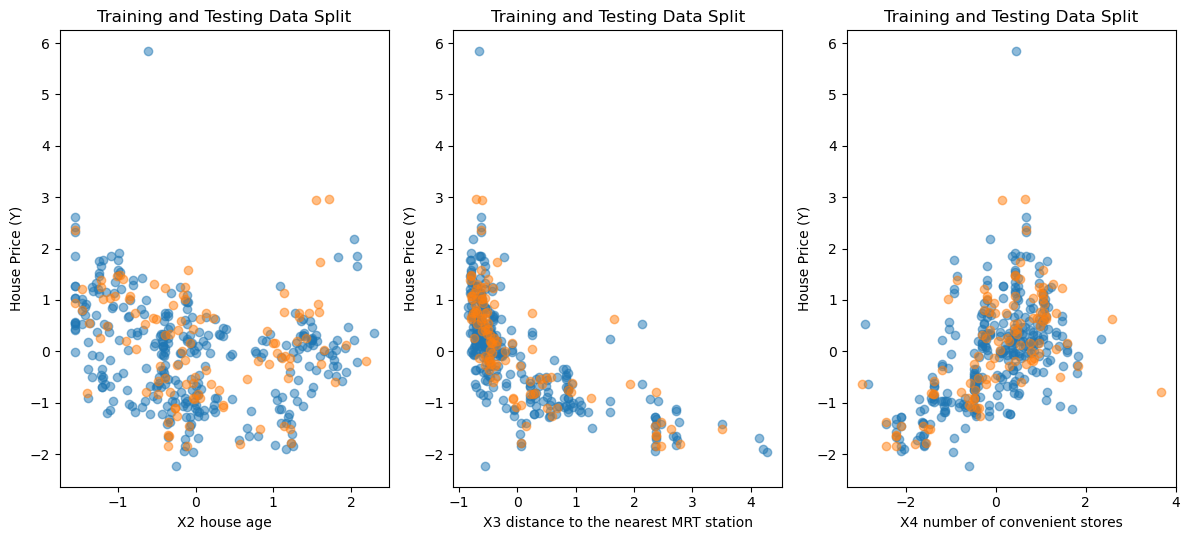

In [299]:
fig, axes = plt.subplots(1, 3, figsize=(12,5.5))

#using X3
# plt.figure(figsize=(7, 5))
axes[1].scatter(train_data[:,3], train_data[:, -1], label='Training Data', alpha=0.5)  
axes[1].scatter(test_data[:, 3], test_data[:, -1], label='Testing Data', alpha=0.5) 
axes[1].set_ylabel('House Price (Y)')
axes[1].set_xlabel('X3 distance to the nearest MRT station')
axes[1].set_title('Training and Testing Data Split')
# plt.show()

#using X2
axes[0].scatter(train_data[:,2], train_data[:, -1], label='Training Data', alpha=0.5)  
axes[0].scatter(test_data[:, 2], test_data[:, -1], label='Testing Data', alpha=0.5) 
axes[0].set_ylabel('House Price (Y)')
axes[0].set_xlabel('X2 house age')
axes[0].set_title('Training and Testing Data Split')

#using x5
axes[2].scatter(train_data[:,5], train_data[:, -1], label='Training Data', alpha=0.5)  
axes[2].scatter(test_data[:, 5], test_data[:, -1], label='Testing Data', alpha=0.5) 
axes[2].set_ylabel('House Price (Y)')
axes[2].set_xlabel('X4 number of convenient stores')
axes[2].set_title('Training and Testing Data Split')

plt.tight_layout()



In [315]:
'''From this plots we can see that the test and split datasets are on the right track, and they are showing strong correlations and distributions 
    with each other.'''

'From this plots we can see that the test and split datasets are on the right track, and they are showing strong correlations and distributions \n    with each other.'

In [300]:
train_features = train_data[:, 1:-1]  # Exclude "no" and "y" columns
train_labels = train_data[:, -1]

test_features = test_data[:, 1:-1]  # Exclude "no" and "y" columns
test_labels = test_data[:, -1]


<h1> perform GD and find learned weights, MSE </h1>

In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

def LR_model(features, labels, learning_rate=0.05, iterations=1000):
    '''performs gradient descent and returns learned weights'''
    n, w = features.shape 
    m = np.zeros(w)
    b = np.random.randn()
    
    for i in range(iterations):
        predicted_model = predict(features, m, b) 
        loss = np.mean(labels -predicted_model )/2 #used for mean squared but function to calculate MSE was created separately
        
        gradient_m = -(2 / n) * np.dot(features.T, labels - predicted_model)
        gradient_b = -(2 / n) * np.sum(labels - predicted_model)
        
        m = m - learning_rate * gradient_m
        b = b - learning_rate * gradient_b
        
    return m, b

def predict(features, m, b):
    '''predicts values from dataset'''
    return np.dot(features, m) + b

def MSE(predicted_model, labels):
    '''calculates mean squared error'''
    return np.mean((predicted_model - labels)**2)



data = pd.read_csv('Real estate.csv')

mean = data.mean()
std = data.std()
data = (data - mean) / std



m, b = LR_model(train_features, train_labels, learning_rate=0.05, iterations=1000)

test_predictions = predict(test_features, m, b)
mse = MSE(test_predictions, test_labels)



slope = m
intercept = b
print('weigths learned:\n m: ', slope, ' \n b: ', intercept )
print('MSE: ', mse)





weigths learned:
 m:  [ 0.08829316 -0.23702247 -0.42527733  0.20852989  0.19083042 -0.01291957]  
 b:  -0.033459142408409595
MSE:  0.3765440056572912


<h1> Use different learning rates </h1>

In [302]:
# Question 3: use different values to retrain the model

#standardize data


learning_rates= [5E-3, 1E-2, 1E-1, 5E-1] 
models = []

for i in learning_rates:
    m, b = LR_model(train_features, train_labels, learning_rate=i, iterations=1000)
    models.append((m, b))

for i, (m, b) in enumerate(models):
    test_predictions = predict(test_features, m, b)
    mse = MSE(test_predictions, test_labels)
    print(f"Learning Rate: {learning_rates[i]}, MSE: {mse}")


print('final model:', m, b)

'''We can observe that 5E-1 is not a good learning rate, since it causes to go to infinity. This means that the model learns too fast and causes the function to go crazy as it 
    performs gradient descent. Therfore, that learning rate will no be used'''

Learning Rate: 0.005, MSE: 0.3756385546835081
Learning Rate: 0.01, MSE: 0.37631201861290403
Learning Rate: 0.1, MSE: 0.37654400643601227
Learning Rate: 0.5, MSE: inf
final model: [ 3.33778948e+208  2.23590442e+208  1.30635807e+210 -1.01757921e+210
 -9.93620248e+209 -1.18035170e+210] 2.295079269714402e+208


C:\Users\eduar\AppData\Local\Temp\ipykernel_28588\1756567189.py:29: RuntimeWarning: overflow encountered in square
  return np.mean((predicted_model - labels)**2)


'We can observe that 5E-1 is not a good learning rate, since it causes to go to infinity. This means that the model learns too fast and causes the function to go crazy as it \n    performs gradient descent. Therfore, that learning rate will no be used'

In [303]:
#Take final model from c and test 

#we will take the one using learning rte 0.1 as it's the closest to 0


m, b = LR_model(train_features, train_labels, learning_rate=0.05, iterations=1000)
test_predictions = predict(test_features, m, b)
mse = MSE(test_predictions, test_labels)
print('learned weights:\n m:', m, '\n b: ', b) 
print('MSE: ', mse)


learned weights:
 m: [ 0.08829316 -0.23702247 -0.42527733  0.20852989  0.19083042 -0.01291957] 
 b:  -0.03345914243010787
MSE:  0.3765440057027395


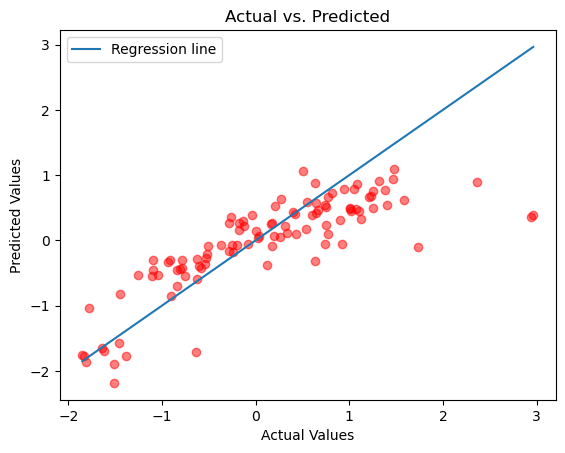

In [304]:
#scartter plot to visualize actual vs predicted and regression line

plt.scatter(test_labels, test_predictions, c='red', alpha=0.5)
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], label='Regression line')
    
plt.title("Actual vs. Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
    
plt.show()

In [305]:
#visualize table to see exact values 
dframe = pd.DataFrame({'Actual': test_labels, 'Predicted': test_predictions})
dframe

,Actual,Predicted
0,1.728573,-0.105788
1,2.963278,0.383603
2,-0.902525,-0.856034
3,-0.836380,-0.447214
4,0.163143,0.245435
...,...,...
99,1.478692,1.088994
100,1.008328,0.476623
101,-0.086738,-0.058031
102,1.015678,0.448640


<h1> Use SKlearn to predict real estate cost </h1>

In [317]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[:, 1:-1], data['Y house price of unit area'], test_size=0.25)
df = pd.read_csv('Real estate.csv')

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the DataFrame columns
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:-1], df['Y house price of unit area'], test_size=0.25, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse1 = mean_squared_error(y_test, y_pred)

slope = model.coef_
intercept = model.intercept_

print('weigths learned:\n m: ', slope, ' \n b: ', intercept )
print('MSE: ', mse1)

r2 = r2_score(y_test, y_pred)

 
print('R-squared (R2):', r2)

 

weigths learned:
 m:  [ 0.12195077 -0.22338461 -0.46264705  0.24426144  0.20011453 -0.04864933]  
 b:  0.021098267187129927
MSE:  0.3610028100119037
R-squared (R2): 0.5796624182861826


In [201]:
dframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dframe


,Actual,Predicted
358,0.523899,0.762523
350,0.317866,0.262162
373,1.046340,0.482541
399,-0.050051,0.184245
369,-1.117008,-0.758633
...,...,...
63,1.252373,0.742067
261,-0.999275,-0.575777
297,-0.697584,-0.294611
113,-2.235474,0.436541


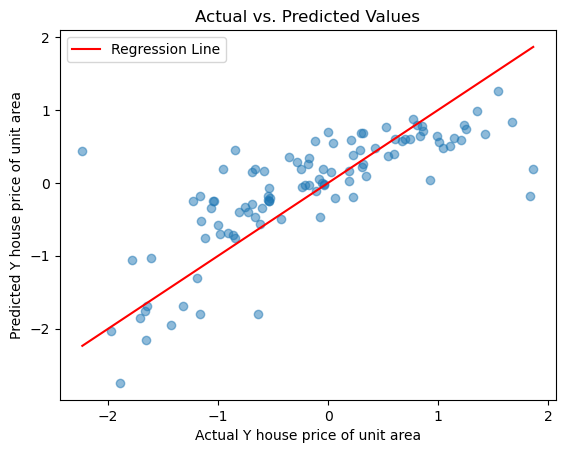

In [202]:


# Create a scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Y house price of unit area")
plt.ylabel("Predicted Y house price of unit area")
plt.title("Actual vs. Predicted Values")

# Plot the regression line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Regression Line')

plt.legend()

plt.show()



<h1> Compare both models </h1>

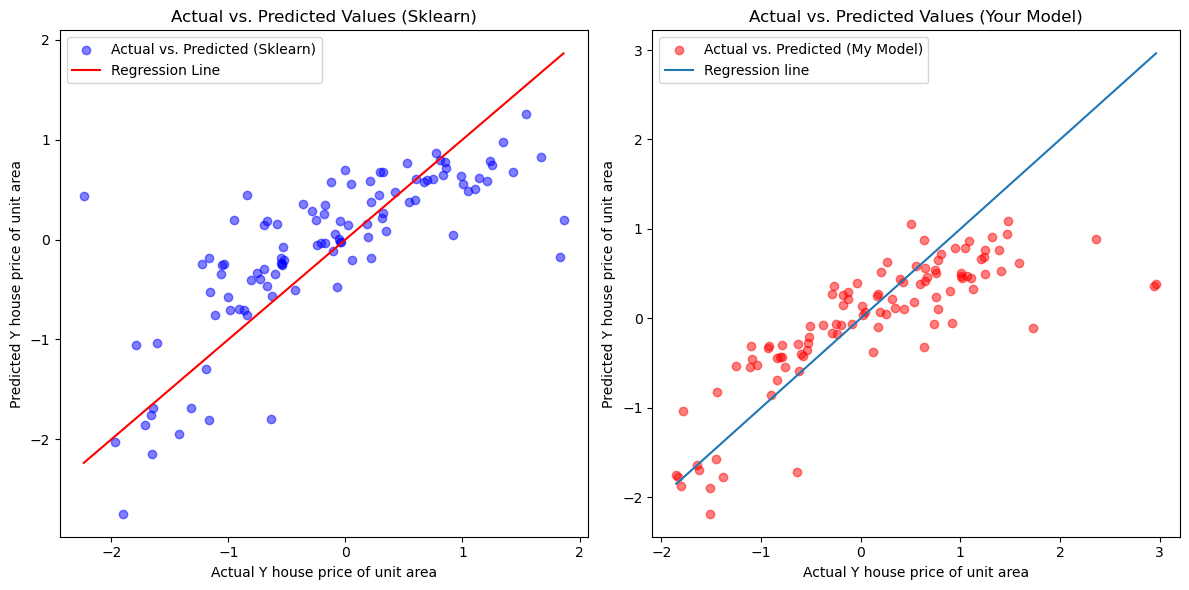

In [307]:


#put both graphs together 

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for actual vs. predicted from Scikit-Learn
axes[0].scatter(y_test, y_pred, alpha=0.5, c='blue', label='Actual vs. Predicted (Sklearn)')
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Regression Line')
axes[0].set_xlabel("Actual Y house price of unit area")
axes[0].set_ylabel("Predicted Y house price of unit area")
axes[0].set_title("Actual vs. Predicted Values (Sklearn)")
axes[0].legend()

# Scatter plot for actual vs. predicted from your model
axes[1].scatter(test_labels, test_predictions, c='red', alpha=0.5, label='Actual vs. Predicted (My Model)')
axes[1].plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], label='Regression line')
axes[1].set_xlabel("Actual Y house price of unit area")
axes[1].set_ylabel("Predicted Y house price of unit area")
axes[1].set_title("Actual vs. Predicted Values (Your Model)")
axes[1].legend()

plt.tight_layout()  # Ensures that the plots do not overlap
plt.show()


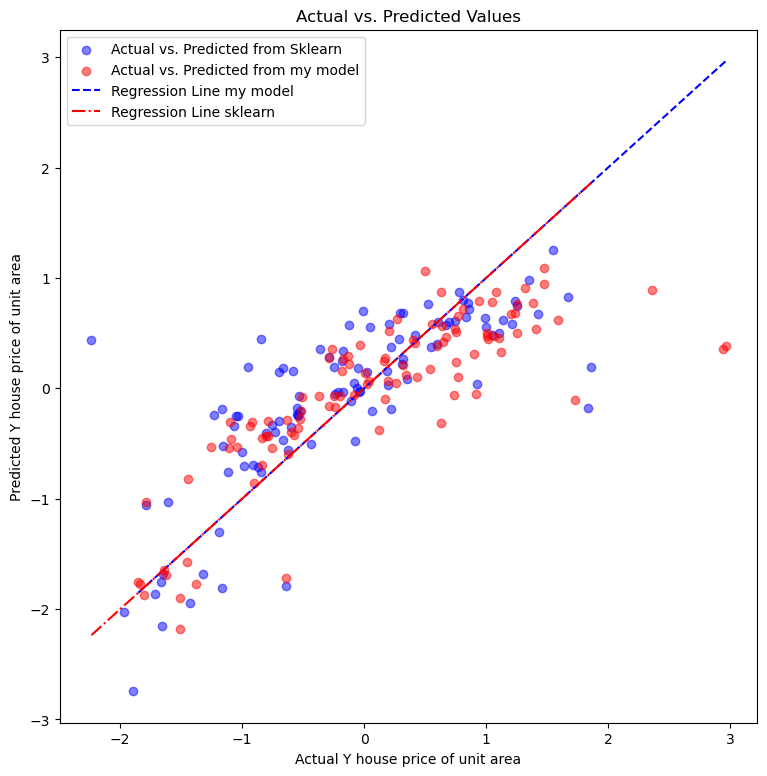

0.3765440057027395 0.3610028100119037


'As we can observe, the values of the MSE are not far from each other. One producing 0.37 and the sklearn one 0.36. The regression model lines\n    seem to fit the model, and the dots show significant correlation. This similarity indicates that our model is logically well developed, and \n     the values are accurately calculated. There is a slight difference in the actual vs predicted scattered plots, which means that our model\n      can still be improved, but we can see that they are strongly correlated. '

In [311]:
#visualize both lines on the same axis 

plt.figure(figsize=(9, 9))

# Scatter plot for actual vs. predicted 
plt.scatter(y_test, y_pred, alpha=0.5, c='blue', label='Actual vs. Predicted from Sklearn')
plt.scatter(test_labels, test_predictions, c='red', alpha=0.5, label='Actual vs. Predicted from my model')

plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='blue', linestyle='--', label='Regression Line my model')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-.', label='Regression Line sklearn')

plt.xlabel("Actual Y house price of unit area")
plt.ylabel("Predicted Y house price of unit area")
plt.title("Actual vs. Predicted Values")
plt.legend() 

plt.show()

print(mse,mse1)


'''As we can observe, the values of the MSE are not far from each other. One producing 0.37 and the sklearn one 0.36. The regression model lines
    seem to fit the model, and the dots show significant correlation. This similarity indicates that our model is logically well developed, and 
    the values are accurately calculated. There is a slight difference in the actual vs predicted scattered plots, which means that our model
    can still be improved, but we can see that they are strongly correlated. In conclusion, we have used sklearn and numpy techniques to predict 
    cost of real estate accurately, created a linear regression model, and attained reasonably good MSE for both models.'''